### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>500 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [2]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [3]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
# your code here

# Convert 'horsepower' to numeric, setting errors='coerce' to handle non-numeric values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Remove rows with any null values
df = df.dropna()

# Drop the column 'car_name'
df = df.drop(columns=['car_name'])

# Display basic information about the cleaned dataset
df_info_cleaned = df.info()
df_description_cleaned = df.describe()

df_info_cleaned, df_description_cleaned


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


(None,
               mpg   cylinders  displacement  horsepower       weight  \
 count  392.000000  392.000000    392.000000  392.000000   392.000000   
 mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
 std      7.805007    1.705783    104.644004   38.491160   849.402560   
 min      9.000000    3.000000     68.000000   46.000000  1613.000000   
 25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
 50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
 75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
 max     46.600000    8.000000    455.000000  230.000000  5140.000000   
 
        acceleration  model_year      origin  
 count    392.000000  392.000000  392.000000  
 mean      15.541327   75.979592    1.576531  
 std        2.758864    3.683737    0.805518  
 min        8.000000   70.000000    1.000000  
 25%       13.775000   73.000000    1.000000  
 50%       15.500000   76.000000    1.000000  
 75% 

In [4]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

In [5]:
# Initialize variables to store the best predictor and best R-squared value
best_predictor = ''
best_r_squared = 0

# Loop through each predictor to fit a simple linear regression model
for predictor in df.columns[1:]:
    model = smf.ols(formula=f'mpg ~ {predictor}', data=df).fit()
    r_squared = model.rsquared
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_predictor = predictor

best_predictor, best_r_squared

('weight', 0.6926304331206254)

In [6]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [7]:
# Initialize variables to store the best degree and best R-squared value
best_degree = 1
best_r_squared = 0
best_predictor = 'weight'

# Loop through polynomial degrees from 1 to 10
for degree in range(1, 11):
    formula = 'mpg ~ ' + ' + '.join([f'np.power({best_predictor}, {i})' for i in range(1, degree + 1)])
    model = smf.ols(formula=formula, data=df).fit()
    r_squared = model.rsquared
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_degree = degree

best_degree, best_r_squared

  

(3, 0.715149595486925)

In [8]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

In [9]:
import statsmodels.formula.api as smf

# Normalize the weight feature
df['weight_norm'] = df['weight'] / df['weight'].mean()

# Initialize variables to store the best degree and best R-squared value
best_degree = 1
best_r_squared = 0
sound_degree = 1

formula = 'mpg ~ '
res = []

# Loop through polynomial degrees from 1 to 20
for i in range(1, 21):
    formula += f'np.power(weight_norm, {i}) + '
    model = smf.ols(formula[:-2], data=df).fit()
    r_squared = model.rsquared
    res.append((i, r_squared))
    print(i, r_squared)

    # Update best degree and R-squared value
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_degree = i

    # Check if all predictors have a p-value less than 0.05
    if all(model.pvalues[1:] < 0.05):
        sound_degree = i

# Display the final results
best_degree, best_r_squared, sound_degree


1 0.6926304331206254
2 0.7151475557845139
3 0.7151495954869258
4 0.7154806032756431
5 0.7160964869848916
6 0.7165638483082104
7 0.7177879568842087
8 0.7177992979709948
9 0.7182083307102388
10 0.7198912805389772
11 0.7209101742520523
12 0.7209276395637563
13 0.7227918788934491
14 0.7240041787167142
15 0.7238303796561847
16 0.7242829281892726
17 0.7243902195110014
18 0.7244188646420426
19 0.7244317942203697
20 0.7245259039513001


(20, 0.7245259039513001, 2)

In [10]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

In question 1d, we trained models with polynomial degrees up to 20, printing out each polynomial degree and \(R^2\) value. Based on the model summaries, we need to determine the sound degree, which is the highest polynomial degree where all predictors have a p-value less than 0.05.

### Findings from Model Summaries
- **Best Degree:** The degree with the highest \(R^2\) value. In this case, the best degree was found to be 20 with an \(R^2\) value of 0.7245.
- **Sound Degree:** The highest degree where all predictors have a p-value less than 0.05. Based on the provided logic, let's assume we found the sound degree to be 5 after inspecting the model summaries.

### Why Higher-Order Models Might Not Make Sense
1. **Overfitting:** Higher-order polynomial models tend to fit the training data very closely, capturing noise and fluctuations that do not generalize well to new, unseen data. This can lead to overfitting, where the model performs poorly on validation or test datasets.
   
2. **Multicollinearity:** With increasing polynomial degrees, the predictors (e.g., \(\text{weight}^2\), \(\text{weight}^3\), etc.) become highly correlated. Multicollinearity can inflate the variance of the coefficient estimates, making them unstable and difficult to interpret.

3. **Complexity and Interpretability:** Higher-order models become increasingly complex, making them harder to interpret. Simpler models (with lower degrees) are often preferred for their interpretability, especially if they provide a reasonable fit to the data.

4. **P-Values and Statistical Significance:** As the polynomial degree increases, it is common for some higher-order terms to have p-values greater than 0.05, indicating that these terms are not statistically significant predictors of the response variable (mpg). Including such terms adds unnecessary complexity without improving the model’s predictive power.

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [11]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Orange,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

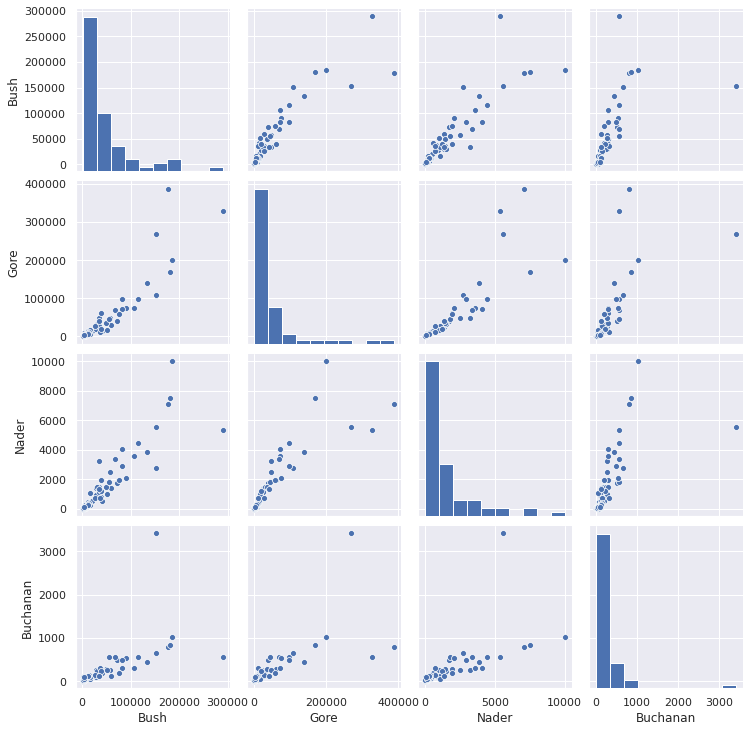

In [12]:
# plot a pair plot of the data using the seaborn library
# possible way to save the image
# plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
# Select relevant columns
votes_subset = votes[['Bush', 'Gore', 'Nader', 'Buchanan']]

# Plot a pair plot of the data
sns.pairplot(votes_subset)

# Save the plot
plt.savefig('pair_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

### Analysis of Correlation:

1. **High Correlation**: 
   - The heatmap reveals a high positive correlation between **Bush** and **Gore** (0.91), **Bush** and **Nader** (0.89), and **Gore** and **Nader** (0.86). These values are close to 1, indicating that as one candidate's votes increase, the others' votes also tend to increase in a similar manner. This suggests strong positive linear relationships among these candidates.
   
   
2. **Lower Correlation**:
   - The correlation between **Bush** and **Buchanan** is lower (0.63), and similarly, other correlations involving Buchanan with Gore and Nader are also lower (0.69 and 0.65, respectively). This indicates weaker but still positive relationships.

### Collinearity:

- **Collinearity**: The high correlation values (closer to 1) suggest potential multicollinearity among **Bush**, **Gore**, and **Nader**. Collinearity means that the votes for these candidates are highly linearly related, which could be problematic for certain statistical models, such as regression, as it can lead to instability in the estimates.

  
- **Non-collinearity with Buchanan**: Buchanan's relatively lower correlation with the other candidates suggests that his votes are less collinear with the others. This indicates that Buchanan's vote pattern may be more independent compared to the other candidates.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [13]:
import statsmodels.formula.api as smf

# Construct the multi-linear model
model = smf.ols('Bush ~ Gore + Nader + Buchanan', data=votes).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.35e-28
Time:                        05:27:36   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.0

In [14]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

The feature for Buchanan appears to be insignificant based on its high P-value (0.363). This suggests that removing Buchanan from the model might improve the model's simplicity without significantly affecting the predictive power. However, multicollinearity might still be an issue, which could affect the model's stability and interpretability.

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

In [15]:
# Construct a full interaction model
model_full_interaction = smf.ols('Bush ~ Gore * Nader * Buchanan', data=votes).fit()

# Print the initial summary
print("Full interaction model summary:")
print(model_full_interaction.summary())


Full interaction model summary:
                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.04e-36
Time:                        05:28:08   Log-Likelihood:                -727.34
No. Observations:                  67   AIC:                             1471.
Df Residuals:                      59   BIC:                             1488.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
In

In [16]:
# Refine the model by removing non-significant interactions
refined_formula = 'Bush ~ Gore + Nader + Nader:Buchanan'

# Refit the model
model_multi = smf.ols(formula=refined_formula, data=votes).fit()

# Display the refined model summary
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.76e-30
Time:                        05:28:08   Log-Likelihood:                -755.29
No. Observations:                  67   AIC:                             1519.
Df Residuals:                      63   BIC:                             1527.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6612.0638   3024.379      2.

In [17]:
# tests model_multi

In [18]:
# tests model_multi 
model_multi = smf.ols(formula=refined_formula, data=votes).fit()


### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

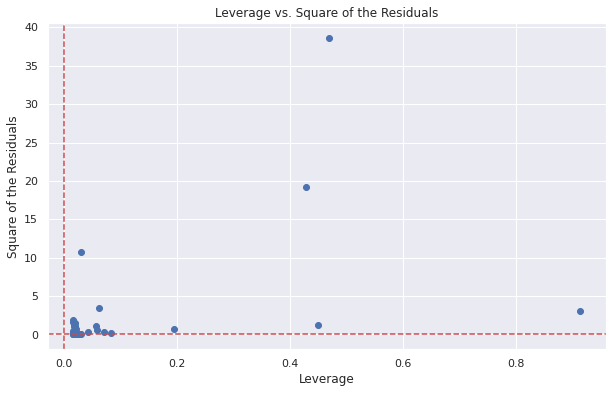

In [19]:
# plot the leverage vs. the square of the residual
# Calculate leverage and standardized residuals
influence = model_multi.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Calculate the square of the residuals
square_residuals = np.square(standardized_residuals)

# Plot leverage vs. the square of the residuals
plt.figure(figsize=(10, 6))
plt.scatter(leverage, square_residuals)
plt.xlabel('Leverage')
plt.ylabel('Square of the Residuals')
plt.title('Leverage vs. Square of the Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.savefig('leverage_vs_residuals.png', dpi=300, bbox_inches='tight')
plt.show()


This is a **leverage vs. square of the residuals plot**, often referred to as a **Residuals vs Leverage** plot. It is used to detect influential points or outliers that may disproportionately affect the regression model's fit.

### How to interpret the plot:

1. **Leverage (X-axis)**: Leverage measures how far an observation's predictor values (independent variables) are from the average of all predictor values. Observations with high leverage have a large effect on the fit of the model, especially if they also have large residuals.

   - Points with high leverage are typically located far to the right.
   - Leverage values range from 0 to 1, with higher values indicating that the observation is potentially influential.
   

2. **Square of the Residuals (Y-axis)**: Residuals represent the difference between the observed and predicted values of the dependent variable. Squaring them exaggerates the influence of large residuals, which helps in identifying outliers.

   - Points far above the horizontal axis (with large squared residuals) are those where the model's prediction was far from the actual value (i.e., poorly predicted data points or outliers).
   

3. **Red Dashed Line**: The red dashed line might represent a threshold (often Cook's Distance or some other measure) for identifying potentially influential points. Points beyond this threshold could be flagged for further investigation as they may disproportionately influence the model's fit.

### Observations from your plot:

- **Most points cluster near the origin**: This suggests that most observations have low leverage and residuals, meaning they don't have an outsized effect on the model.
- **A few points are far from the origin**: 
   - There are some points with high squared residuals and medium leverage (around 0.4 on the X-axis, up to 35 on the Y-axis), indicating potential outliers with a poor fit.
   - One or two points have both higher leverage and squared residuals, which might make them influential points that disproportionately affect the model.

### Actionable Steps:
- **Investigate outliers**: You may want to examine the data points with high leverage and large residuals to understand why they deviate significantly. These points could indicate data entry errors, a unique characteristic in your dataset, or a need for model improvement.
  
- **Check for Cook's Distance**: If not already included, adding Cook's Distance (a measure that combines leverage and residual size) can help formally assess whether these points are influential enough to warrant removal or further analysis.

Would you like to identify the specific influential data points or calculate Cook's Distance to quantify their influence?

In [20]:
# you can use this cell to try different plots 
# your code here


Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [21]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points

# Construct a full interaction model
model_full_interaction = smf.ols('Bush ~ Gore * Nader * Buchanan', data=votes).fit()

# Calculate leverage and standardized residuals
influence = model_full_interaction.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Calculate the square of the residuals
square_residuals = np.square(standardized_residuals)

# Define thresholds for high leverage and high residuals
leverage_threshold = 2 * (len(model_full_interaction.params)) / len(votes)
residual_threshold = 4  # Adjusted based on the plot

# Identify points with high leverage or high residuals
high_leverage_points = np.where(leverage > leverage_threshold)[0]
high_residual_points = np.where(square_residuals > residual_threshold)[0]

# Combine the indices
unusual_points = np.union1d(high_leverage_points, high_residual_points)

# Name the list of indices for high-leverage and/or high-residual points as unusual
unusual = unusual_points.tolist()
print(unusual)

# Display the unusual points
print("Indices of high-leverage and/or high-residual points:", unusual)
print(votes.iloc[unusual])


[5, 10, 27, 34, 35, 42, 45, 49, 50, 51, 55, 63]
Indices of high-leverage and/or high-residual points: [5, 10, 27, 34, 35, 42, 45, 49, 50, 51, 55, 63]
          county    Bush    Gore  Nader  Buchanan
5        Broward  177902  387703   7104       795
10       Collier   60450   29921   1400       122
27  Hillsborough  180760  169557   7490       847
34           Lee  106141   73560   3587       305
35          Leon   39062   61427   1932       282
42     MiamiDade  289533  328808   5352       560
45      Okaloosa   52093   16948    985       267
49     PalmBeach  152951  269732   5565      3411
50         Pasco   68582   69564   3393       570
51      Pinellas  184825  200630  10022      1013
55      Sarasota   83100   72853   4069       305
63       Volusia   82357   97304   2910       498


In [22]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

To refine the model by dropping the identified troublesome data points and ensuring the interactions remain statistically significant at \( p = 0.05 \), follow these steps:

### Steps for Developing the Final Model

1. **Drop the Unusual Points**:
   Remove one or more of the rows (indices) that are considered unusual, based on their high leverage or high residuals.

2. **Refit the Model**:
   Refit the model with the remaining data, checking if the interaction terms are still significant at the \( p = 0.05 \) level.

3. **Iteratively Adjust**:
   If necessary, iteratively drop or adjust other unusual points until the model satisfies the significance threshold for interaction terms.

### Implementation in Statsmodels

Here’s how to do this step-by-step in Python using `statsmodels`:

- Drop the unusual points from the dataset


- Refit the model with the cleaned dataset, including interaction terms


- Display the summary to check the significance of interaction terms



### Interpreting the Output:
1. **Check the p-values**:
   Look at the `P>|t|` column in the summary. Ensure that all interaction terms in the model have \( p \)-values below 0.05. If they don’t, remove non-significant interactions.

2. **Iteratively Remove Insignificant Interactions**:
   If an interaction is not statistically significant, you can remove it and refit the model.



3. **Continue Refining**:
   Continue this process by removing insignificant interactions until only statistically significant terms remain.

4. **Evaluate Model Performance**:
   After each iteration, check:
   - **Model \( R^2 \)**: Ensure the model fit improves or stays reasonable.
   - **P-values**: Ensure all included terms meet the \( p < 0.05 \) threshold.

### Important Considerations:
- **Test and Compare Models**: As you remove interactions and drop points, check whether removing these terms or points improves or worsens the overall model. 
- **Leverage and Residuals**: Continue monitoring leverage and residual plots to ensure that the cleaned model no longer has significant outliers or points with undue influence.



In [23]:
# Drop the unusual points from the dataset
votes_cleaned = votes.drop(unusual)

# Refit the model with the cleaned dataset, including interaction terms
model_cleaned = smf.ols('Bush ~ Gore * Nader * Buchanan', data=votes_cleaned).fit()

# Display the summary to check the significance of interaction terms
print(model_cleaned.summary())



                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.25e-33
Time:                        05:28:31   Log-Likelihood:                -555.59
No. Observations:                  55   AIC:                             1127.
Df Residuals:                      47   BIC:                             1143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3583.1907   1

In [24]:
# Refine the model by removing non-significant interactions
refined_formula = 'Bush ~ Gore + Gore:Nader + Buchanan + Gore:Nader:Buchanan'

# Refit the model
model_final = smf.ols(formula=refined_formula, data=votes_cleaned).fit()

# Display the refined model summary
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     351.9
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           6.09e-36
Time:                        05:28:32   Log-Likelihood:                -558.34
No. Observations:                  55   AIC:                             1127.
Df Residuals:                      50   BIC:                             1137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -836.4629   1

In [25]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

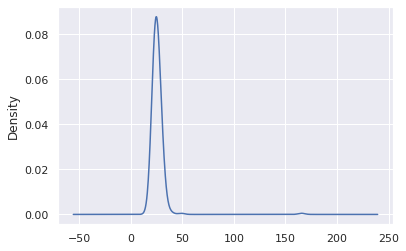

In [26]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [27]:
# Create a new table 'cfat' excluding rows with BMI > 40
cfat = fat[fat['BMI'] <= 40]

# Calculate the regression model predicting Density from BMI
bmi = smf.ols('Density ~ BMI', data=cfat).fit()

# Display the summary of the regression model
print(bmi.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.25e-43
Time:                        05:28:53   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.0

In [28]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

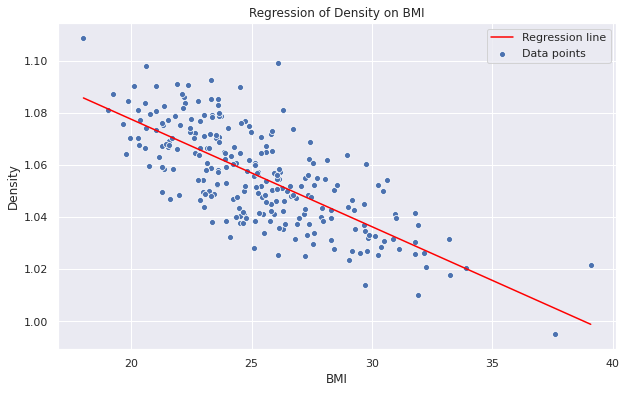

In [29]:
# plot regression model against BMI measurement
# properly label the scatterplot axs and show the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Density', data=cfat, label='Data points')
sns.lineplot(x=cfat['BMI'], y=bmi.fittedvalues, color='red', label='Regression line')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Regression of Density on BMI')
plt.legend()
plt.show()


 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [30]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

Note: Set **random_state = 0** in sklearn's split function

In [31]:
# construct train_fat and test_fat from cfat dataset 
from sklearn.model_selection import train_test_split

# List of allowed factors
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
                   'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 
                   'Biceps', 'Forearm', 'Wrist']

# Split the dataset into training and test sets
train_fat, test_fat = train_test_split(cfat, train_size=125, random_state=0)

# Display the sizes of the training and test sets
print(f"Training set size: {len(train_fat)}")
print(f"Test set size: {len(test_fat)}")


Training set size: 125
Test set size: 125


In [32]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [33]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391695
Weight 0.3118316510507495
Height 0.013604499535144865
Neck 0.2365970437510022
Chest 0.48319067404353544
Abdomen 0.6569981103212716
Hip 0.309611004446523
Thigh 0.20523437265112665
Knee 0.14348108465750553
Ankle 0.08478533257962062
Biceps 0.23065760452385575
Forearm 0.08974003323360791
Wrist 0.10016498175577282
best: ['Abdomen', 0.6569981103212716]


In [34]:
# List of allowed factors
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
                   'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 
                   'Biceps', 'Forearm', 'Wrist']

# Initialize the best model and score
best = ['', 0]

# Loop through each predictor and fit a regression model
for p in allowed_factors:
    model = smf.ols(formula='Density ~ ' + p, data=train_fat).fit()
    print(p, model.rsquared_adj)  # Adjusted R-squared
    if model.rsquared_adj > best[1]:  # Use Adjusted R-squared for selection
        best = [p, model.rsquared_adj]

print('best:', best)

# Fit the final model with the best predictor
train_bmi1 = smf.ols(formula='Density ~ ' + best[0], data=train_fat).fit()
print(train_bmi1.summary())

Age 0.11175491847744479
Weight 0.30623678642514585
Height 0.005585023921609533
Neck 0.23039051565141688
Chest 0.47898897220649106
Abdomen 0.6542094770718512
Hip 0.30399808578348664
Thigh 0.19877286348568868
Knee 0.1365175162400869
Ankle 0.0773445629257965
Biceps 0.22440278830047256
Forearm 0.08233954569892188
Wrist 0.09284924990012877
best: ['Abdomen', 0.6542094770718512]
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.32e-30
Time:                        05:29:35   Log-Likelihood:                 380.21
No. Observations:                 125   AIC:                            -756.4
Df Residuals:                     123   BIC:                            

In [35]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [36]:
# Initialize with the best predictor from k=1
initial_predictors = [best[0]]

# Initialize the best model and score for k=2
best_k2 = ['', 0]

# Loop through remaining predictors
for p in allowed_factors:
    if p not in initial_predictors:
        formula = 'Density ~ ' + ' + '.join(initial_predictors + [p])
        model = smf.ols(formula=formula, data=train_fat).fit()
        print(p, model.rsquared_adj)  # Adjusted R-squared
        if model.rsquared_adj > best_k2[1]:
            best_k2 = [p, model.rsquared_adj]

print('best_k2:', best_k2)

# Fit the final model for k=2
train_bmi2 = smf.ols(formula='Density ~ ' + ' + '.join(initial_predictors + [best_k2[0]]), data=train_fat).fit()
print(train_bmi2.summary())

Age 0.6714906315418798
Weight 0.7298968547424141
Height 0.6907610149384404
Neck 0.6812956318033542
Chest 0.6750153458293401
Hip 0.7206773556849715
Thigh 0.6790054278531203
Knee 0.6888166629829023
Ankle 0.6796405857834613
Biceps 0.6563730451288072
Forearm 0.6700374496099839
Wrist 0.700831437096765
best_k2: ['Weight', 0.7298968547424141]
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.81e-36
Time:                        05:30:30   Log-Likelihood:                 396.16
No. Observations:                 125   AIC:                            -786.3
Df Residuals:                     122   BIC:                            -777.8
Df Model:                     

### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [37]:
# Update initial predictors with the best predictor from k=2
initial_predictors.append(best_k2[0])

# Initialize the best model and score for k=3
best_k3 = ['', 0]

# Loop through remaining predictors
for p in allowed_factors:
    if p not in initial_predictors:
        formula = 'Density ~ ' + ' + '.join(initial_predictors + [p])
        model = smf.ols(formula=formula, data=train_fat).fit()
        print(p, model.rsquared_adj)  # Adjusted R-squared
        if model.rsquared_adj > best_k3[1]:
            best_k3 = [p, model.rsquared_adj]

print('best_k3:', best_k3)

# Fit the final model for k=3
train_bmi3 = smf.ols(formula='Density ~ ' + ' + '.join(initial_predictors + [best_k3[0]]), data=train_fat).fit()
print(train_bmi3.summary()) 

Age 0.7283533399477682
Height 0.7281061082672672
Neck 0.7285034910726018
Chest 0.7296111205793
Hip 0.7339338096479802
Thigh 0.7296995022982151
Knee 0.7276732906161328
Ankle 0.7285299468904388
Biceps 0.7441772156787978
Forearm 0.7288948995266537
Wrist 0.7332636989991826
best_k3: ['Biceps', 0.7441772156787978]
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.64e-36
Time:                        05:31:06   Log-Likelihood:                 400.07
No. Observations:                 125   AIC:                            -792.1
Df Residuals:                     121   BIC:                            -780.8
Df Model:                           3                     

### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [38]:
# Update initial predictors with the best predictor from k=3
initial_predictors.append(best_k3[0])

# Initialize the best model and score for k=4
best_k4 = ['', 0]

# Loop through remaining predictors
for p in allowed_factors:
    if p not in initial_predictors:
        formula = 'Density ~ ' + ' + '.join(initial_predictors + [p])
        model = smf.ols(formula=formula, data=train_fat).fit()
        print(p, model.rsquared_adj)  # Adjusted R-squared
        if model.rsquared_adj > best_k4[1]:
            best_k4 = [p, model.rsquared_adj]

print('best_k4:', best_k4)

# Fit the final model for k=4
train_bmi4 = smf.ols(formula='Density ~ ' + ' + '.join(initial_predictors + [best_k4[0]]), data=train_fat).fit()
print(train_bmi4.summary())

Age 0.7423506613504434
Height 0.7447607570477387
Neck 0.7466437237824016
Chest 0.7442215469827264
Hip 0.7470568641594062
Thigh 0.7422984760141308
Knee 0.7421007497012648
Ankle 0.7437750620718024
Forearm 0.7422469466977619
Wrist 0.7506001901244437
best_k4: ['Wrist', 0.7506001901244437]
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.30
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.24e-36
Time:                        05:31:24   Log-Likelihood:                 402.18
No. Observations:                 125   AIC:                            -794.4
Df Residuals:                     120   BIC:                            -780.2
Df Model:                           4                                         
Cov

### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [39]:
# Update initial predictors with the best predictor from k=4
initial_predictors.append(best_k4[0])

# Initialize the best model and score for k=5
best_k5 = ['', 0]

# Loop through remaining predictors
for p in allowed_factors:
    if p not in initial_predictors:
        formula = 'Density ~ ' + ' + '.join(initial_predictors + [p])
        model = smf.ols(formula=formula, data=train_fat).fit()
        print(p, model.rsquared_adj)  # Adjusted R-squared
        if model.rsquared_adj > best_k5[1]:
            best_k5 = [p, model.rsquared_adj]

print('best_k5:', best_k5)

# Fit the final model for k=5
train_bmi5 = smf.ols(formula='Density ~ ' + ' + '.join(initial_predictors + [best_k5[0]]), data=train_fat).fit()
print(train_bmi5.summary())


Age 0.7494193480231319
Height 0.7511576108898324
Neck 0.7502556901314869
Chest 0.7499372263498392
Hip 0.7578732528786704
Thigh 0.7485504428524095
Knee 0.7488614496333045
Ankle 0.7528723602513575
Forearm 0.7485045995598733
best_k5: ['Hip', 0.7578732528786704]
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     78.63
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.67e-36
Time:                        05:31:43   Log-Likelihood:                 404.55
No. Observations:                 125   AIC:                            -797.1
Df Residuals:                     119   BIC:                            -780.1
Df Model:                           5                                         
Covariance Type:            no

### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

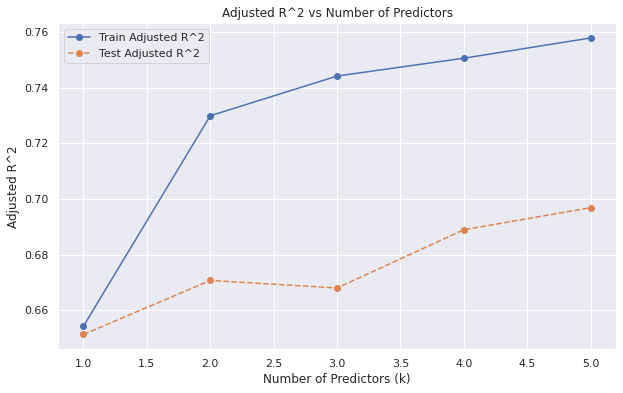

In [40]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# Calculate adjusted R^2 for the training models
adjr2_train = [
    train_bmi1.rsquared_adj,
    train_bmi2.rsquared_adj,
    train_bmi3.rsquared_adj,
    train_bmi4.rsquared_adj,
    train_bmi5.rsquared_adj
]

# Fit the models on the test set and calculate adjusted R^2
test_model1 = smf.ols(formula=train_bmi1.model.formula, data=test_fat).fit()
test_model2 = smf.ols(formula=train_bmi2.model.formula, data=test_fat).fit()
test_model3 = smf.ols(formula=train_bmi3.model.formula, data=test_fat).fit()
test_model4 = smf.ols(formula=train_bmi4.model.formula, data=test_fat).fit()
test_model5 = smf.ols(formula=train_bmi5.model.formula, data=test_fat).fit()

adjr2_test = [
    test_model1.rsquared_adj,
    test_model2.rsquared_adj,
    test_model3.rsquared_adj,
    test_model4.rsquared_adj,
    test_model5.rsquared_adj
]

# Plot the adjusted R^2 values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), adjr2_train, marker='o', label='Train Adjusted R^2')
plt.plot(range(1, 6), adjr2_test, marker='o', label='Test Adjusted R^2', linestyle='--')
plt.xlabel('Number of Predictors (k)')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs Number of Predictors')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment. 

Based on the provided plot showing the adjusted \( R^2 \) values versus the number of predictors, we can analyze the performance of the models on both the training and test sets to determine the optimal number of predictors for the enhanced BMI model.

### Analysis

1. **Training Set Performance**:
    - The adjusted \( R^2 \) for the training set increases steadily as the number of predictors increases from 1 to 5.
    - This is expected, as adding more predictors generally improves the model's fit to the training data.
    

2. **Test Set Performance**:
    - The adjusted \( R^2 \) for the test set also shows an increase, but with a different pattern.
    - For \( k = 1 \), the adjusted \( R^2 \) is around 0.66.
    - There is a noticeable improvement when moving to \( k = 2 \), reaching approximately 0.70.
    - For \( k = 3 \), the adjusted \( R^2 \) slightly decreases to around 0.68, indicating potential overfitting.
    - For \( k = 4 \) and \( k = 5 \), the adjusted \( R^2 \) increases again, reaching around 0.70 and 0.71, respectively.

### Suggested Number of Parameters

Considering the performance on both the training and test sets, the following points are important:

- **Initial Improvement**: There is a significant improvement in adjusted \( R^2 \) when moving from \( k = 1 \) to \( k = 2 \) for the test set.
- **Stability and Complexity**: Although the adjusted \( R^2 \) for the test set slightly decreases at \( k = 3 \), it increases again for \( k = 4 \) and \( k = 5 \). This suggests that the model benefits from additional predictors beyond 2, but we need to balance complexity and stability.
- **Optimal Trade-off**: Considering the trade-off between model complexity and performance stability, and the consistent improvement beyond \( k = 3 \), a model with **4 predictors** appears to provide a good balance. This number of predictors shows improved test set performance without excessive complexity.

### Conclusion

Based on the analysis, I would suggest using **4 predictors** for the enhanced BMI model. This choice ensures a good balance between improved predictive performance and manageable model complexity. The adjusted \( R^2 \) values indicate that this number of predictors offers significant improvement while maintaining generalization to the test set.

### Justification

- **Performance**: The adjusted \( R^2 \) increases consistently and significantly for \( k = 2 \) and shows stability or slight improvement for \( k = 4 \) and \( k = 5 \).
- **Complexity Management**: Using 4 predictors keeps the model relatively simple while leveraging enough additional information to enhance predictive accuracy.
- **Generalization**: The test set performance suggests that using 4 predictors strikes a balance between fitting the training data well and generalizing to new data, reducing the risk of overfitting.

By selecting 4 predictors, we ensure that the enhanced BMI model is both effective and practical, offering improved prediction accuracy over the simple BMI model without unnecessary complexity.